<a href="https://colab.research.google.com/github/minsu-yoo/RGC-raster/blob/main/RGC_spikes_by_Electrical_Stimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google drive 에 data 파일이 있을 경우 Path 를 설정해줍니다. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')  

!ls "/content/drive/My Drive"  
!cp "/content/drive/My Drive/mtSpikeTimes.mat" "mtSpikeTimes.mat"  #copy 를 합니다. 
!cp "/content/drive/My Drive/Data.mat" "Data.mat"  #copy 를 합니다. 
!cp "/content/drive/My Drive/ChaData.mat" "ChaData.mat"  #copy 를 합니다. 
!cp "/content/drive/My Drive/20200707_WT3_stim_info.xlsx" "20200707_WT3_stim_info.xlsx"  #copy 를 합니다. 



from scipy.io import loadmat  #MATLAB file 을 불러올 수 있게 library 를 import 한다. 
mtSpikes = loadmat('mtSpikeTimes.mat')
import numpy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 20200707_WT3_stim_info.xlsx  'Colab Notebooks'   mtSpikeTimes.mat
 ChaData.mat		       Data.mat


In [5]:
import numpy
from scipy.io import loadmat  #MATLAB file 을 불러올 수 있게 library 를 import 한다. 
import matplotlib.pyplot as plt
import seaborn as sns  #more beautiful tool for drawing 

raw_rgc_spikes = loadmat('ChaData.mat')

In [7]:
# Readout Excel file of Stimulation information
import pandas as pd

stim_info = pd.read_excel('20200707_WT3_stim_info.xlsx', index_col=0)  
np_stim = stim_info.to_numpy()  #panda data type을 numpy 형태로 불러냅니다. 

#put the information as matrix form

우선은 가장 센 stimulus를 대상으로 분석하였습니다. 

In [8]:
light_start_index = 4 #light stimulation 

es_index = 18 #Electrical stimulation starting index


ls50_column = 0
ls100_column = 4


ls100_stim = np_stim[light_start_index:light_start_index+10,4]
es_stim = np_stim[es_index:es_index+20,4]

Channel 의 이름과 Spike 정보들을 연결시켜서 dictionary 형태로 담아줍니다. 

In [9]:
ch_label = []  
ch_spikes = []

for key, value in raw_rgc_spikes.items():
    ch_label.append(key)
    ch_spikes.append(value)
    
    
spike_dict = {}
total_channel_n = len(raw_rgc_spikes.keys())

for i in range(4,total_channel_n):
    chN = int(ch_label[i][3:5])  #Channel number ex) '12'
    chN_string = ch_label[i][3:6]
    spike_dict[chN_string] = ch_spikes[i]

In [10]:
spike_labels = list(spike_dict.keys())

In [12]:
print(spike_labels[0])  # 순서대로 spike 들을 볼 수 있다.
spikes = spike_dict[spike_labels[0]]



12a


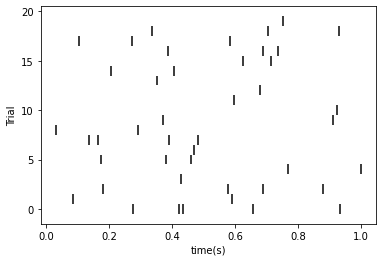

In [13]:
spikes_by_trial = []
trial_spikes = []


stim_duration = es_stim[1] - es_stim[0]
for stim_index in range(len(es_stim)):
    spikes_by_trial.append([i for i in spikes if (es_stim[stim_index] <i < es_stim[stim_index] + stim_duration)])
    trial_spikes.append( [i - es_stim[stim_index] for i in spikes if (es_stim[stim_index] <i < es_stim[stim_index] + stim_duration)]) 
    plt.vlines(trial_spikes[stim_index], stim_index-.5 , stim_index+.5)
    


plt.xlabel('time(s)')
plt.ylabel('Trial')

plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

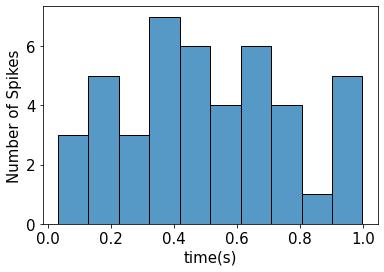

In [14]:
flat_list = [item for sublist in trial_spikes for item in sublist]

Spikes_in_oneLine = numpy.asarray(flat_list)

ax = sns.histplot(Spikes_in_oneLine, bins = 10,legend = None)
ax.set(xlabel='time(s)', ylabel='Number of Spikes')
plt.show()

In [15]:
def show_me_the_spikes(cell_id):
    spikes = spike_dict[spike_labels[cell_id]]
    ch_id = spike_labels[cell_id] #string in channel ID
    spikes_by_trial = []
    trial_spikes = []


    stim_duration = es_stim[1] - es_stim[0]
    for stim_index in range(len(es_stim)):
        spikes_by_trial.append([i for i in spikes if (es_stim[stim_index] <i < es_stim[stim_index] + stim_duration)])
        trial_spikes.append( [i - es_stim[stim_index] for i in spikes if (es_stim[stim_index] <i < es_stim[stim_index] + stim_duration)]) 
        plt.vlines(trial_spikes[stim_index], stim_index-.5 , stim_index+.5)



    plt.xlabel('time(s)')
    plt.ylabel('Trial')
    plt.title(ch_id)

    plt.rcParams.update({'font.size': 15})
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    
    flat_list = [item for sublist in trial_spikes for item in sublist]

    Spikes_in_oneLine = numpy.asarray(flat_list)
    plt.figure()

    ax = sns.histplot(Spikes_in_oneLine, bins = 10,legend = None)
    ax.set(xlabel='time(s)', ylabel='Number of Spikes')
    plt.show()



    
    
    
    

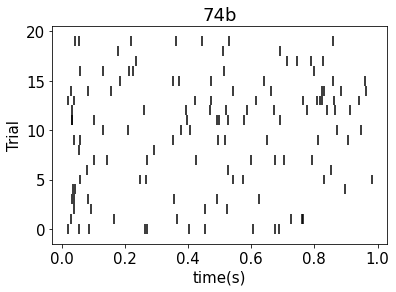

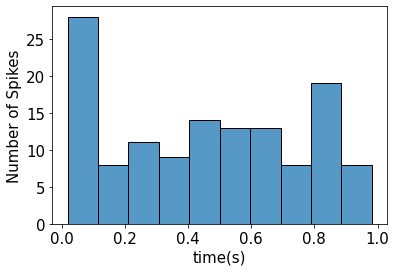

In [17]:
show_me_the_spikes(101)  #101 번째 neuron의 반응을 봅니다. 